In [1]:
VERSION

v"1.1.1"

In [2]:
using Flux, Plots, BSON

In [3]:
d = 5
pyplot(leg=true)
plot_x = range(-1, stop = 1, length = 20)
plot_t = range(0, stop = 1, length = 20)

0.0:0.05263157894736842:1.0

In [4]:
# True function and other stuff.
g(x, _h) = _h .* exp.(-1 .* view(x, d+1, :, :))
g(x) = g(x, h(x))
pi_by_2 = Float32(π) / 2
sin_term(x) = sin.(pi_by_2 .* view(x, 1, :, :))
h(x, _sin) = 2 .* _sin
h(x) = h(x, sin_term(x))
u_true(xs_and_t) = g(xs_and_t)
u_true_plot(t, x) = u_true(vcat(x, zeros(Float32, d - 1, 1), t))[1]
u_theta_plot(t, x) = uθ(vcat(x, zeros(Float32, d -1, 1), t)).data[1]
u_diff(t, x) = abs(u_true_plot(t, x) - u_theta_plot(t, x))


u_diff (generic function with 1 method)

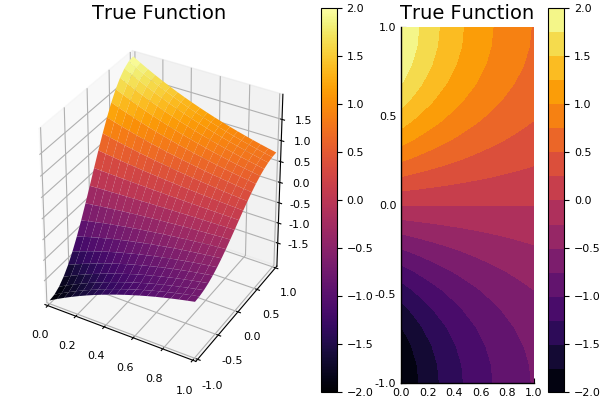

In [5]:
l1 = @layout [a{0.7w} b]
p_true = plot(plot_t, plot_x, u_true_plot, st = [:surface, :contourf], layout=l1, title="True Function")

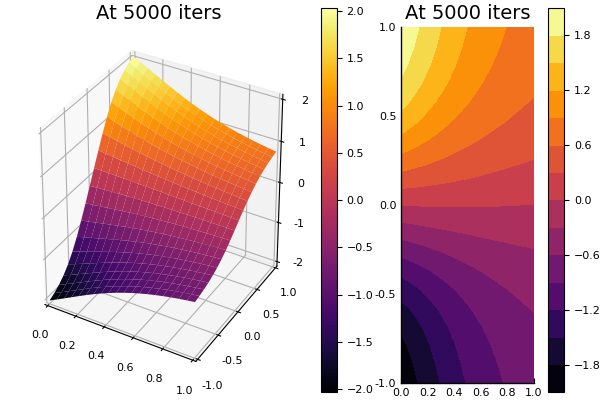

In [6]:
uθ = BSON.load("./weights/prim5000.bson")[:u1] # Load the primal network at 5000 iters
l2 = @layout [a{0.7w} b]
p_theta = plot(plot_t, plot_x, u_theta_plot, st = [:surface, :contourf], layout=l2, title="At 5000 iters")


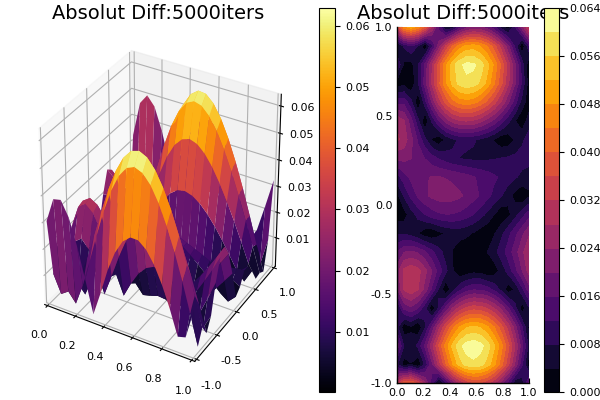

In [7]:
l3 = @layout [a{0.7w} b]
p_diff = plot(plot_t, plot_x, u_diff, st = [:surface, :contourf], layout=l3, title="Absolut Diff:5000iters")


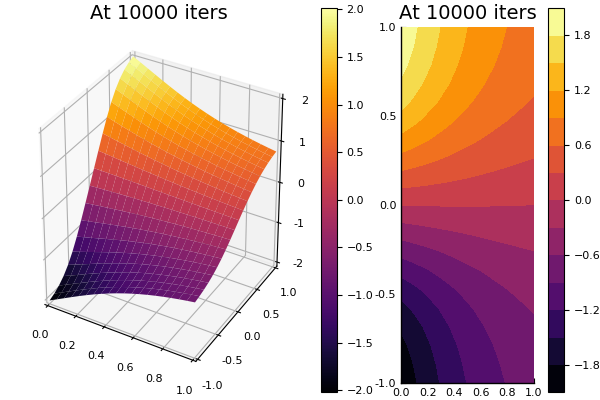

In [8]:
uθ = BSON.load("./weights/prim10000.bson")[:u1] # Load the primal network at 10000 iters
l2 = @layout [a{0.7w} b]
p_theta = plot(plot_t, plot_x, u_theta_plot, st = [:surface, :contourf], layout=l2, title="At 10000 iters")


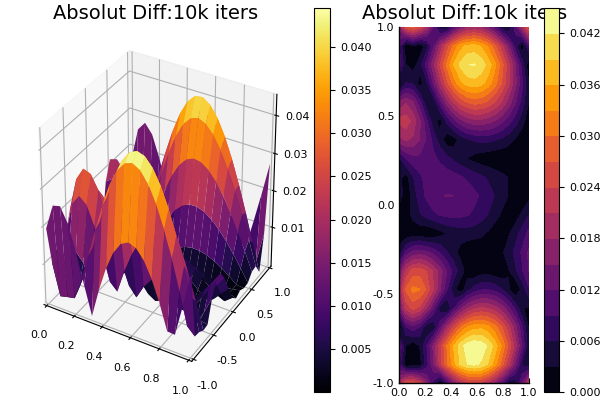

In [9]:
l3 = @layout [a{0.7w} b]
p_diff = plot(plot_t, plot_x, u_diff, st = [:surface, :contourf], layout=l3, title="Absolut Diff:10k iters")


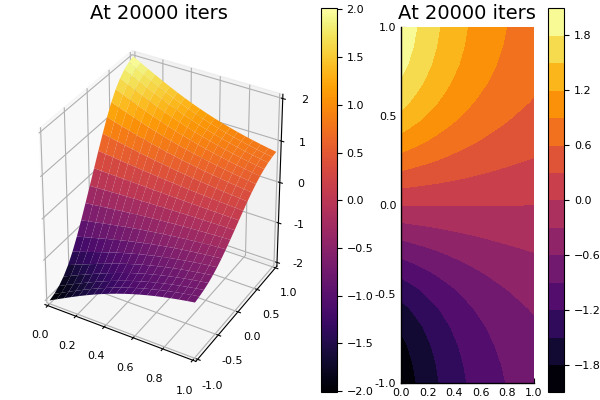

In [10]:
uθ = BSON.load("./weights/primal20000.bson")[:u1] # Load the primal network at 20000 iters
l2 = @layout [a{0.7w} b]
p_theta = plot(plot_t, plot_x, u_theta_plot, st = [:surface, :contourf], layout=l2, title="At 20000 iters")


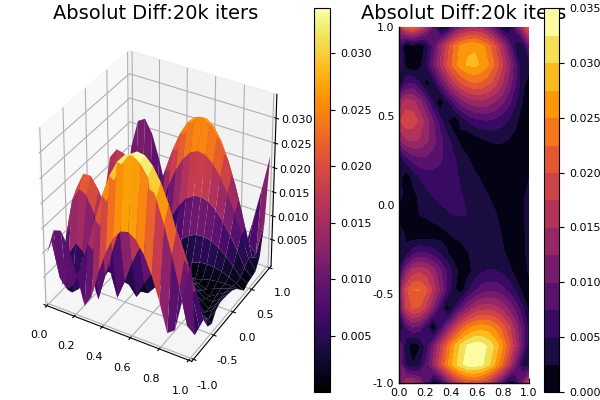

In [11]:
l3 = @layout [a{0.7w} b]
p_diff = plot(plot_t, plot_x, u_diff, st = [:surface, :contourf], layout=l3, title="Absolut Diff:20k iters")
